<H2> Yash Pragnesh Gandhi <br><br> Github id: yash4gandhi <br><br> USC ID: 1150578261

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as fsm


<h3>1. (a) Read data

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [3]:
df.shape

(9568, 5)

In [4]:
df.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [5]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

<h3>1 . (b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows
and columns represent?


In [6]:
print("Number of rows in data:", df.shape[0])
print("Number of Columns in data:", df.shape[1])

Number of rows in data: 9568
Number of Columns in data: 5


Rows consist of hourly average data points collected from a cycle power plant from the year 2006 to 2011. 
Column consists of: <br>
AT : Ambient variables Temperature<br>
AP : Ambient Pressure<br>
V :  Exhaust Vacuum<br>
RH : Relative Humidity<br>
PE : Energy output of the cycle power plant<br>


<h3>ii. Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

Text(0.5, 1, 'Scatter Plot of each Independent Variable')

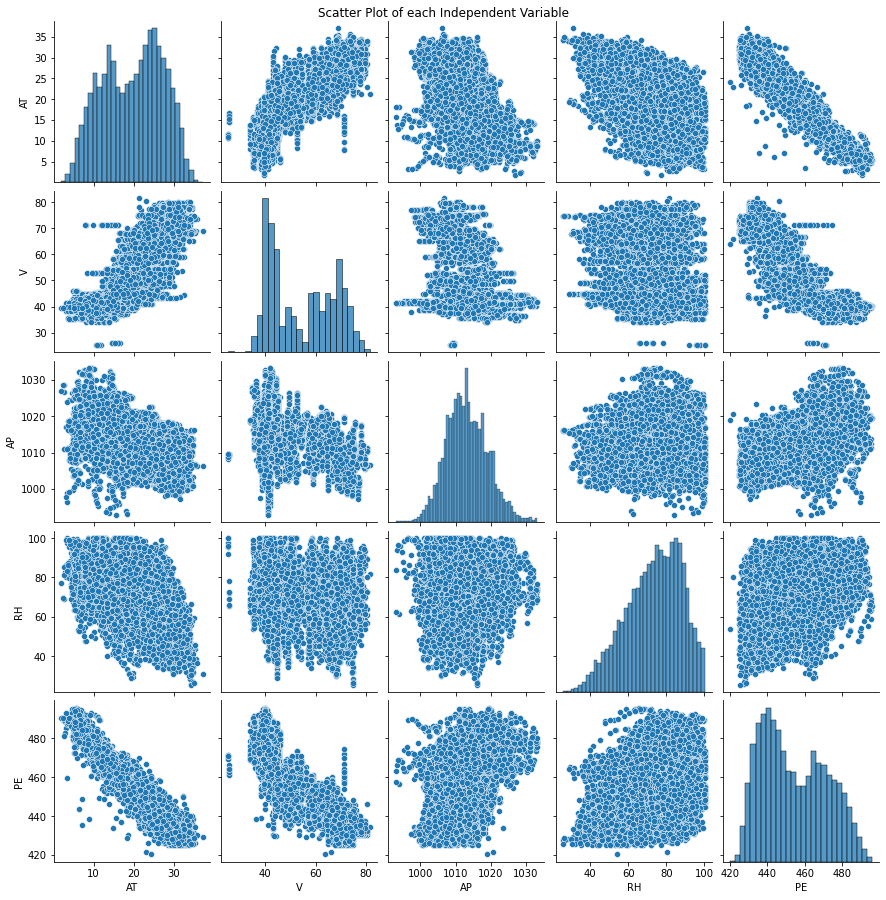

In [7]:
scatter_plot = sns.pairplot(df)
scatter_plot.fig.suptitle('Scatter Plot of each Independent Variable',y=1)

<h4> Most of the predictors have a near linear relationship with each other and the output PE. However, the relationship is not so linear among AP and V, V and RH, AP and V. It can also be confirmed using the below pearson correlation matirx.

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

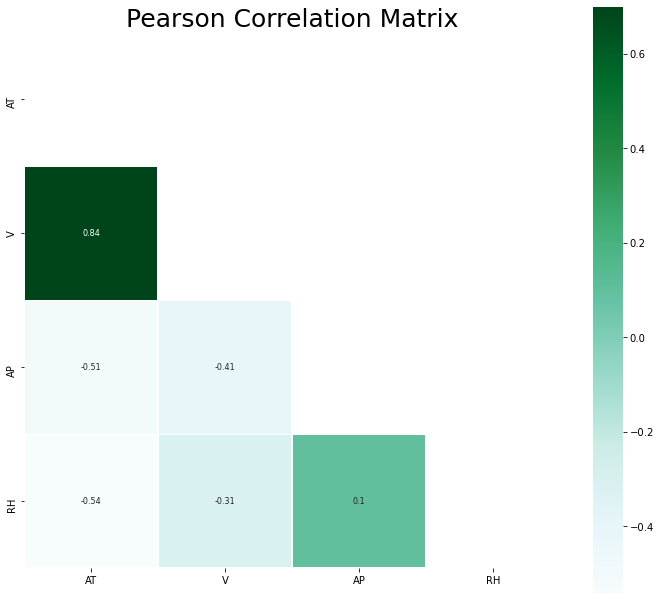

In [45]:
col = df.columns.tolist()
col.remove('PE')
mask = np.zeros_like(df[col].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[col].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})


<h3>iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [8]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
col = df.columns.tolist()

In [10]:
d= [['Column' ,'Mean', 'Median','First-Quartile','Third-Qaurtile', 'Inter-QuartileRange','Range']]

for i in col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1 
    d.append([i,round(df[i].mean(),3),round(df[i].median(),3),Q1,Q3,IQR.round(3),df[i].max()-df[i].min()])
data = pd.DataFrame(d[1:],columns=d[0])
data

,Column,Mean,Median,First-Quartile,Third-Qaurtile,Inter-QuartileRange,Range
0,AT,19.651,20.345,13.5100,25.72,12.210,35.30
1,V,54.306,52.080,41.7400,66.54,24.800,56.20
2,AP,1013.259,1012.940,1009.1000,1017.26,8.160,40.41
3,RH,73.309,74.975,63.3275,84.83,21.502,74.60
4,PE,454.365,451.550,439.7500,468.43,28.680,75.50


<h3>(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [11]:
col.remove('PE')

In [41]:
single_coeff = [['Predictor','Simple Linear Regression Coefficient']]
for i in col:
    trainX = sm.add_constant(np.array(df[i]).reshape(-1,1))
    trainY = np.array(df['PE']).reshape(-1,1)
    lr = sm.OLS(trainY,trainX).fit()
    print('Predictor :   ',i)
    print('')
    print(lr.summary())
    single_coeff.append([i,lr.params[1]])
    print('')
    print('')
    

Predictor :    AT

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:22:36   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156 

NameError: name 'OLSInfluence' is not defined

<h4> All the predictors have higher Rsquared value along with p = 0. Hence, all predictors have statistically significant association with the dependent response. We can also see the linear relation in the following plots.

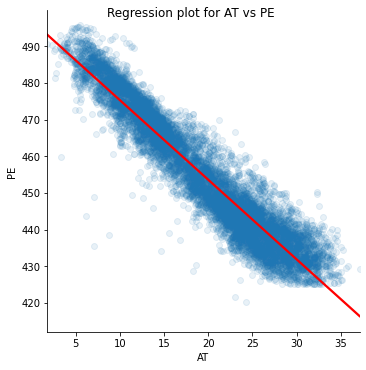

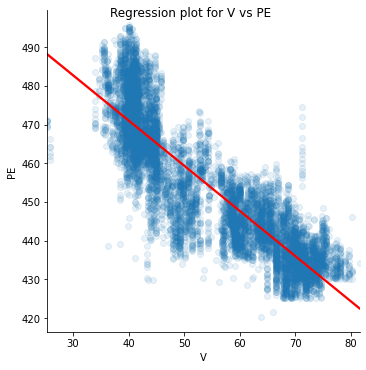

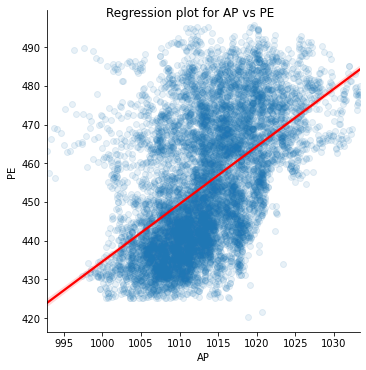

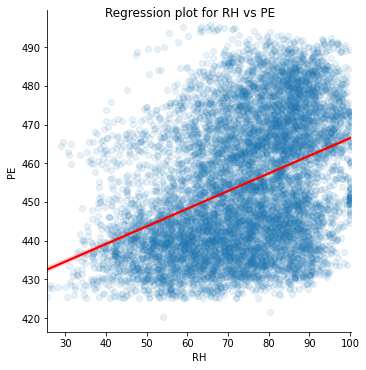

In [13]:
for i in col:
    title = 'Regression plot for '+i+' vs PE'
    lm = sns.lmplot(x=i,y='PE',data=df,fit_reg=True,line_kws={'color': 'red'},scatter_kws= {'alpha': 0.1}) 
    fig = lm.fig
    fig.suptitle(title)

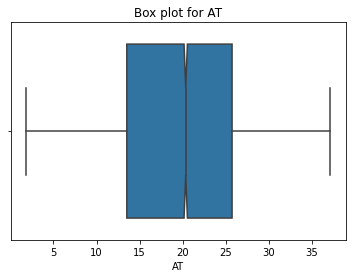

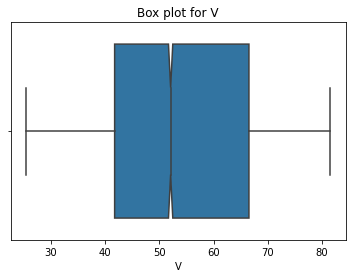

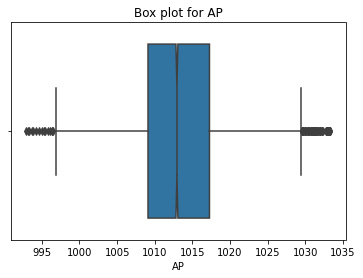

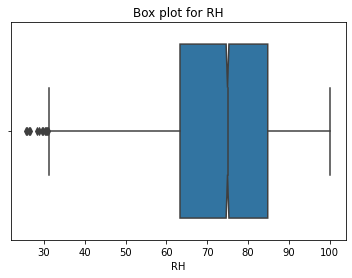

In [14]:
for i in col:
    title = 'Box plot for '+i
    sns.boxplot(df[i],notch=True).set_title(title) 
    plt.show()

In [ ]:
df.drop(c,axis = 1)

<h4> From the above box plots we can see that there are some significant outliers(marked using the notches) which can be removed to improve the model.

<h3>(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?

In [15]:
trainX = sm.add_constant(df.drop('PE',axis=1))
trainY = df[['PE']]
lr = sm.OLS(trainY,trainX).fit()
print(lr.summary())
multi_coeff = lr.params[1:]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:57:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

<h4> All the predictors have p value 0 i.e less than 0.05. Hence, we will reject the null hypothesis H0 : βj = 0. In the above Multiple Regression we also get very good R squared value.
    

<h3>(e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.


In [16]:
multicoeffdf = pd.DataFrame({'Predictor':multi_coeff.index, 'Multiple Linear Regression Coefficient':multi_coeff.values})
singlecoeffdf = pd.DataFrame(single_coeff[1:],columns=single_coeff[0])

In [17]:
coeff = pd.merge(left = singlecoeffdf, right = multicoeffdf, left_on = 'Predictor', right_on = 'Predictor')
coeff

,Predictor,Simple Linear Regression Coefficient,Multiple Linear Regression Coefficient
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


In [18]:
multicoeffdf

,Predictor,Multiple Linear Regression Coefficient
0,AT,-1.977513
1,V,-0.233916
2,AP,0.062083
3,RH,-0.158054


In [19]:
singlecoeffdf

,Predictor,Simple Linear Regression Coefficient
0,AT,-2.171320
1,V,-1.168135
2,AP,1.489872
3,RH,0.455650


Text(0.5, 0.98, 'Simple vs Multiple Regression Coefficiets')

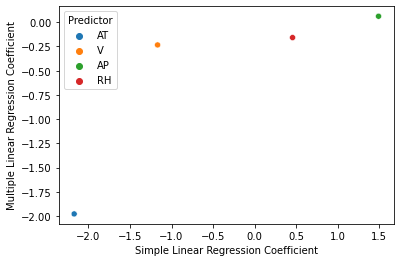

In [20]:
coef_plot = sns.scatterplot(y="Multiple Linear Regression Coefficient", x="Simple Linear Regression Coefficient", hue='Predictor', data=coeff)
scatter_plot.fig.suptitle('Simple vs Multiple Regression Coefficiets')

<H4>The Values of the coefficient are significantly different in both the models

<h1> Answer

<h3> (f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form2
Y = β0 + β1X + β2X
2 + β3X
3 + epsillon


In [21]:
for i in col:
    trainX = np.array(df[i]).reshape(-1,1)
    poly = PolynomialFeatures(3,include_bias = True)
    trainX = poly.fit_transform(trainX)
    #trainX = sm.add_constant(trainX)
    trainY = np.array(df['PE']).reshape(-1,1)
    lr = sm.OLS(trainY,trainX).fit()
    print('Predictor :   ',i)
    print('')
    print(lr.summary())
    results = list(zip(lr.params.round(2), poly.get_feature_names()))
    print('')
    print("Model form used :",results)
    print('')
    print('')


Predictor :    AT

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:57:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673 

<h4> As we can see that the p value for all the non linear predictor terms is 0 except for V^2 which has grater than 0.05. Hence, all other terms have statistical significance 

<h3>(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [22]:
trainX = df.drop('PE',axis=1)
trainX = np.array(trainX)
#trainX = sm.add_constant(trainX)
poly = PolynomialFeatures(interaction_only = True, include_bias= True)
trainX = poly.fit_transform(trainX)
trainY = np.array(df['PE']).reshape(-1,1)
lr = sm.OLS(trainY,trainX).fit()
print('')
print(lr.summary())
results = list(zip(lr.params, poly.get_feature_names()))
print('')
print('The model form : ',results)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:57:09   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.

<H4> X1 : AT<br> X2 : V<br> X3 : AP<br> X4 : RH <br> X5 : AT x V<br>X6 : AT x AP<br>X7 : AT x RH<br>X8 : V x AP<br>X9 : V x RH<br>X10 : AP x RH

<h4>x1, x6 and x9 i.e AT, AT*AP and V*RH do not have statistical significance as they have p value greater than 0.05. Other Interactions have evidence of association with the response

<h3>(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.


In [23]:
train_X =  sm.add_constant(df.drop('PE',axis=1))
train_Y = df[['PE']]
trainX,testX,trainy,testy=train_test_split(train_X,train_Y,train_size=0.7, random_state = 15)

In [24]:
result = [['Model','MSE Test']]

In [25]:
lr = sm.OLS(trainy,trainX).fit()
test_pred = lr.predict(testX)
train_pred = lr.predict(trainX)
train_error = mean_squared_error(trainy,train_pred)
test_error = mean_squared_error(testy,test_pred)
print('Multiple Linear Regression Model considering only the linear predictors without interaction')
print('Test Mean Squared Error ',test_error.round(3))
print('Train Mean Squared Error ',train_error.round(3))
result.append(['Multiple Linear Regression Model considering only the linear predictors without interaction',test_error.round(3)])

Multiple Linear Regression Model considering only the linear predictors without interaction
Test Mean Squared Error  20.703
Train Mean Squared Error  20.796


In [26]:
train_X =  df.drop('PE',axis=1)
train_Y = df[['PE']]
trainX,testX,trainy,testy=train_test_split(train_X,train_Y,train_size=0.7, random_state = 15)

In [27]:
poly = PolynomialFeatures(2,include_bias = False)
trainX = poly.fit_transform(trainX)
testX = poly.fit_transform(testX)

In [28]:
lr = sm.OLS(trainy,trainX).fit()
test_pred = lr.predict(testX)
train_pred = lr.predict(trainX)
train_error = mean_squared_error(trainy,train_pred)
test_error = mean_squared_error(testy,test_pred)
print('Multiple Linear Regression Model considering  all possible interaction terms and quadratic nonlinearities')
print('Test Mean Squared Error ',test_error.round(3))
print('Train Mean Squared Error ',train_error.round(3))
print(lr.summary())
result.append(['Multiple Linear Regression Model considering  all possible interaction terms and quadratic nonlinearities',test_error.round(3)])

Multiple Linear Regression Model considering  all possible interaction terms and quadratic nonlinearities
Test Mean Squared Error  18.154
Train Mean Squared Error  18.192
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.425e+06
Date:                Fri, 11 Feb 2022   Prob (F-statistic):                        0.00
Time:                        22:57:09   Log-Likelihood:                         -19217.
No. Observations:                6697   AIC:                                  3.846e+04
Df Residuals:                    6683   BIC:                                  3.856e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust

<H4> X1 : AT<br> X2 : V<br> X3 : AP<br> X4 : RH <br>X5 : AT ^ 2<br>X6 : V ^ 2<br>X7 : AP ^ 2<br> X8 : RH ^ 2<br>X9 : AT x V<br>X10 : AT x AP<br>X11 : AT x RH<br>X12 : V x AP<br>X13 : V x RH<br>X14 : AP x RH

<H4>Considering only p <= 0.05, we can remove the following insignificant interactions : X2, X9, X10, X11

In [29]:
train,test=train_test_split(df,train_size=0.7, random_state = 15)

In [30]:
model_form = 'PE ~ AT + AP + RH + AT*AT + V*V + AP*AP + RH*RH + V*AP + V*RH + AP*RH'

In [ ]:
lr = fsm.ols(formula = model_form, data = train).fit()
test_pred = lr.predict(testX)
train_pred = lr.predict(trainX)
train_error = mean_squared_error(trainy,train_pred)
test_error = mean_squared_error(testy,test_pred)
print('Multiple Linear Regression Model considering only significant interaction terms and quadratic nonlinearities')
print('Test Mean Squared Error ',test_error.round(3))
print('Train Mean Squared Error ',train_error.round(3))
print(lr.summary())
result.append(['Multiple Linear Regression Model considering only significant interaction terms and quadratic nonlinearities',test_error.round(3)])

<h3>(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.


In [31]:
train_X = df.drop('PE',axis=1)
train_Y = df[['PE']]
trainX,testX,trainy,testy=train_test_split(train_X,train_Y,train_size=0.7, random_state = 15)

ERROR! Session/line number was not unique in

<h4> KNN With Raw Features

In [35]:
k_dict_train = {}
k_dict_test = {}
for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors = k)
    model = knn.fit(trainX,trainy)
    test_pred = model.predict(testX)
    train_pred = model.predict(trainX)
    k_dict_test[k] = mean_squared_error(testy, test_pred)
    k_dict_train[k] = mean_squared_error(trainy, train_pred)
    
most_suitable_k = min(k_dict_test, key=k_dict_test.get)
print('The most suitable k for KNN is ', most_suitable_k)
print('Test Mean Squared Error for this k is',k_dict_test[most_suitable_k].round(3))
print('Train Mean Squared Error for this k is',k_dict_train[most_suitable_k].round(3))
k_dict_traindf = pd.DataFrame(k_dict_train.items(), columns=['K', 'MSE'])
k_dict_testdf = pd.DataFrame(k_dict_test.items(), columns=['K', 'MSE'])
result.append(['KNN with raw features',k_dict_test[most_suitable_k].round(3)])

The most suitable k for KNN is  7
Test Mean Squared Error for this k is 15.798
Train Mean Squared Error for this k is 12.034


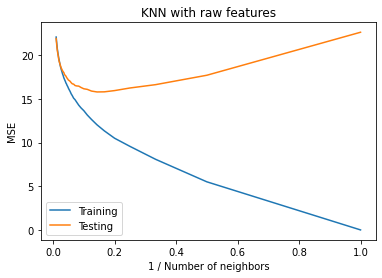

In [36]:
plt.plot(1/k_dict_traindf['K'],k_dict_traindf['MSE'], label= 'Training')
plt.plot(1/k_dict_testdf['K'],k_dict_testdf['MSE'], label= 'Testing')
plt.legend()
plt.xlabel('1 / Number of neighbors')
plt.ylabel('MSE')
plt.title('KNN with raw features')
plt.show()

<h4> KNN with Normalization

In [37]:
trainX = preprocessing.normalize(trainX)
testX = preprocessing.normalize(testX)

In [38]:
k_dict_train = {}
k_dict_test = {}
for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors = k)
    model = knn.fit(trainX,trainy)
    test_pred = model.predict(testX)
    train_pred = model.predict(trainX)
    k_dict_test[k] = mean_squared_error(testy, test_pred)
    k_dict_train[k] = mean_squared_error(trainy, train_pred)
    
most_suitable_k = min(k_dict_test, key=k_dict_test.get)
print('The most suitable k for KNN is ', most_suitable_k)
print('Test Mean Squared Error for this k is',k_dict_test[most_suitable_k].round(3))
print('Train Mean Squared Error for this k is',k_dict_train[most_suitable_k].round(3))
k_dict_traindf = pd.DataFrame(k_dict_train.items(), columns=['K', 'MSE'])
k_dict_testdf = pd.DataFrame(k_dict_test.items(), columns=['K', 'MSE'])
result.append(['KNN with normalized features',k_dict_test[most_suitable_k].round(3)])

The most suitable k for KNN is  12
Test Mean Squared Error for this k is 16.961
Train Mean Squared Error for this k is 15.242


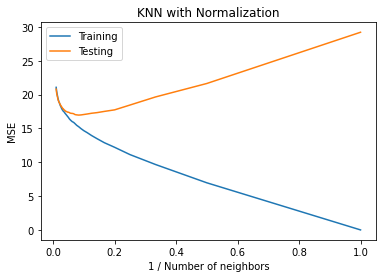

In [39]:
plt.plot(1/k_dict_traindf['K'],k_dict_traindf['MSE'], label= 'Training')
plt.plot(1/k_dict_testdf['K'],k_dict_testdf['MSE'], label= 'Testing')
plt.legend()
plt.xlabel('1 / Number of neighbors')
plt.ylabel('MSE')
plt.title('KNN with Normalization')
plt.show()

<h3>(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

In [40]:
resultdf = pd.DataFrame(result[1:], columns = result[0])
resultdf

,Model,MSE Test
0,Multiple Linear Regression Model considering o...,20.703
1,Multiple Linear Regression Model considering ...,18.154
2,KNN with raw features,15.798
3,KNN with normalized features,16.961


<h4> KNN with only raw features has the lowest MSE and is the best model for the dependent variable in given dataset. KNN being a non parametric approach does not give us information about which all independent variables are highly associated with the response. Linear regression does give the important predictor information. 

<h3>
2. ISLR: 2.4.1<br><br>
    
For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.<br><br>
    (a) The sample size n is extremely large, and the number of predictors p is small.<br>
    Ans : Larger Sample size would ensure better results with flexible statistical model as it will ensure less overfitting. The flexible model would also reduce the bias more.<br><br>(b) The number of predictors p is extremely large, and the number of observations n is small.<br>Ans : Having less number of observation with large independent variables will lead to overfitting in flexible methods. The flexible will lead to less reduction in bias and high variance. Hence, inflexible method is better.<br><br>(c) The relationship between the predictors and response is highly non-linear.<br>Ans : The Flexible method would perform better because it has more degrees of freedom which would help to identify the non-linearlity and predict accordingly.<br><br>(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.<br>
    Ans : The flexible method would be worse than the inflexible method in general. Because, the flexible method would incorporate more noise with high variance. 
    
<br>3. ISLR: 2.4.7<br><br>
    
(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.<br>
    Ans : Using the formula for Euclidean distance: sqrt of ((x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2) and with test coordinate as (0,0,0)<br>
    d1 = 3<br>
    d2 = 2<br>
    d3 = 10^1/2 = 3.16<br>
    d4 = 5^1/2 = 2.24 <br>
    d5 = 2^1/2 = 1.41<br>
    d6 = 3^1/2 = 1.73<br>
<br><br>(b) What is our prediction with K = 1? Why?<br>
    Ans : From the above values, d5 is the closest value to (0,0,0) with distance of 1.41. Hence, we select observation 5 and  the color assigned to test value is green
    
<br><br>(c) What is our prediction with K = 3? Why?<br>
    Ans : For k = 3, we take the closest 3 points. Point 2,5 and 6. As 2 and 6 is red and point 5 is green, we chose the majority red and assign it to test point.  
    
<br><br>(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?<br>
    Ans : The k value expected should be smaller. This is because, higher k value would in turn take into account larger obervation points and make the boundary linear which will also lead to higher variance. Hence, small k value will give a more flexible boundary.